In [104]:
import datetime as dt
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt

In [53]:
end = dt.date.today()
start = dt.date.today() - dt.timedelta(days=2*365)

In [84]:
symbol = 'IBM'
ibm = yf.Ticker(symbol)

ibm.info

In [87]:
df = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [88]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,131.673035,133.776291,130.439774,133.059280,120.535095,3947499
2021-09-30,133.843216,134.388138,132.409180,132.820267,120.318573,6090230
2021-10-01,134.799240,137.638626,134.196945,137.017212,124.120491,6907889
2021-10-04,136.462708,139.579346,136.089859,137.772461,124.804649,7689251
2021-10-05,138.384323,138.623322,136.367111,136.854691,123.973259,7297524


In [89]:
df['Date'] = df.index

df.head(1)

In [92]:
MA_1 = 30
MA_2 = 50

In [93]:
df[f'MA_{MA_1}'] = df['Adj Close'].rolling(window=MA_1).mean()
df[f'MA_{MA_2}'] = df['Adj Close'].rolling(window=MA_2).mean()


In [94]:
df = df.iloc[MA_2:]

In [95]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Date,MA_30,MA_50
Date,,,,,,,,,
2021-12-09,122.150002,123.949997,121.790001,123.570000,113.432724,4601100,2021-12-09,109.223675,113.528438
2021-12-10,124.300003,125.330002,123.360001,124.089996,113.910049,4966900,2021-12-10,109.387939,113.400268
2021-12-13,123.760002,124.360001,120.790001,122.580002,112.523926,6847500,2021-12-13,109.527360,113.168336


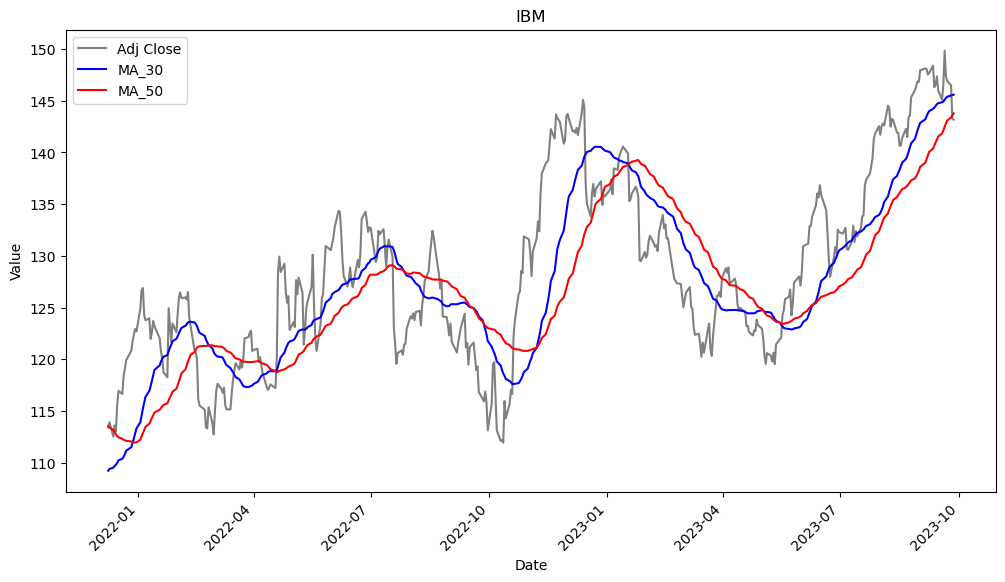

In [99]:
plt.figure(figsize=(12,6))
plt.plot('Date', 'Adj Close', data=df, label='Adj Close', color='grey')
plt.plot('Date', 'MA_30', data=df, label='MA_30', color='blue')
plt.plot('Date', 'MA_50', data=df, label='MA_50', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.title(symbol)
plt.show()

In [101]:
# Create a model which itterates through rows of the pandas dataframe.
# Buy_signal triggered when MA_30 passes MA_50 and sell_signal triggered when MA_50 crosses MA_30

buy_signals = []
sell_signals = []
in_buy_trade = False
in_sell_trade = False
for index, day in df.iterrows():
    if day['MA_30'] > day['MA_50'] and in_buy_trade == False:
        buy_signals.append(day['Date'])
        in_buy_trade = True
        in_sell_trade = False
    elif day['MA_30'] < day['MA_50'] and in_sell_trade == False:
        sell_signals.append(day['Date'])
        in_buy_trade = False
        in_sell_trade = True



In [102]:
buy_signals

[Timestamp('2021-12-29 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-09-19 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2023-05-02 00:00:00'),
 Timestamp('2023-06-12 00:00:00')]

In [103]:
sell_signals

[Timestamp('2021-12-09 00:00:00'),
 Timestamp('2022-02-28 00:00:00'),
 Timestamp('2022-07-27 00:00:00'),
 Timestamp('2022-09-27 00:00:00'),
 Timestamp('2023-01-18 00:00:00'),
 Timestamp('2023-05-15 00:00:00')]

In [ ]:
# Backtesting